<a href="https://colab.research.google.com/github/Doniwyk/07_2241720015_mobile_programming/blob/main/08_Doni_Wahyu_Kurniawan_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2 as cv
import math

from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def add_padding(image, pad):
    return np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

def convolution2d(image, kernel, stride=1, padding=0):
    # Menambahkan padding pada citra
    if padding > 0:
        image = add_padding(image, padding)

    # Mendapatkan dimensi citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi output
    output_height = ((image_height - kernel_height) // stride) + 1
    output_width = ((image_width - kernel_width) // stride) + 1

    output = np.zeros((output_height, output_width))

    # Melakukan konvolusi
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Wilayah yang akan dikalikan dengan kernel
            region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            # Mengalikan kernel dengan region, lalu menjumlahkan
            output[i, j] = np.sum(region * kernel)

    # Normalisasi hasil konvolusi (membawa kembali ke rentang 0-255)
    output = np.clip(output, 0, 255)

    return output.astype(np.uint8)  # Mengembalikan dalam format 8-bit

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

kernel_left_sobel = np.array([[1,0,-1],
                              [2,0,-2],
                              [1,0,-1]])

kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

gaussian_5x5 = np.array([[1,4,6,4,1],
                        [4,16,24,16,4],
                        [6,24,36,24,6],
                        [4,16,24,16,4],
                        [1,4,6,4,1]]) / 256

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

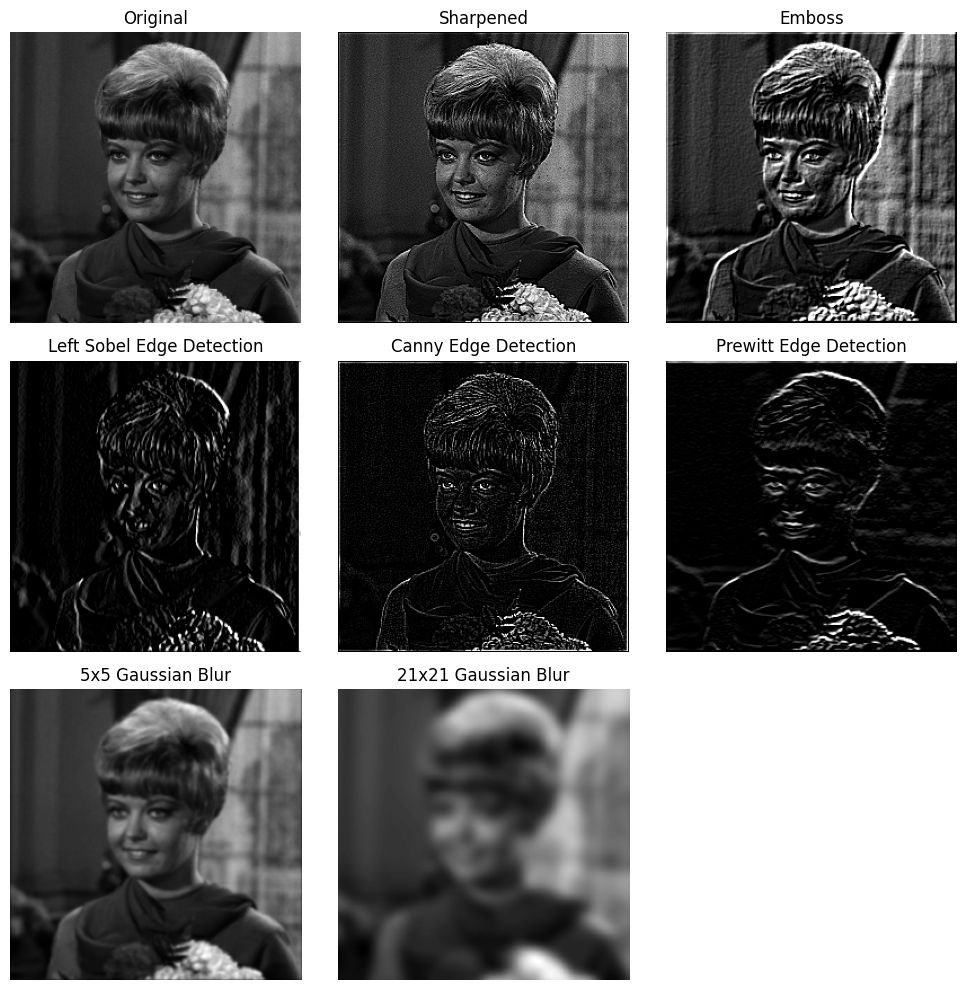

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

images = [
    (img_gray, 'Original'),
    (convolution2d(img_gray, kernel_sharpen, 1, 2), 'Sharpened'),
    (convolution2d(img_gray, kernel_emboss, 1, 2), 'Emboss'),
    (convolution2d(img_gray, kernel_left_sobel, 1, 2), 'Left Sobel Edge Detection'),
    (convolution2d(img_gray, kernel_canny, 1, 2), 'Canny Edge Detection'),
    (convolution2d(img_gray, kernel_prewitt, 1, 2), 'Prewitt Edge Detection'),
    (convolution2d(img_gray, gaussian_5x5, 1, 2), '5x5 Gaussian Blur'),
    (convolution2d(img_gray, gaussian_kernel_2d, 1, 2), '21x21 Gaussian Blur')
]

for ax, (image, title) in zip(axes.ravel(), images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()
